In [39]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Embedding, GlobalAveragePooling1D

In [40]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [41]:
reviews = df['review'].values
df['sentiment'] = df['sentiment'].map({'negative': 0, 'positive': 1})
sentiments = df['sentiment'].values

In [42]:
num_words = 10000
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(reviews)
sequences = tokenizer.texts_to_sequences(reviews)

In [43]:
max_len = 200
x_data = pad_sequences(sequences, maxlen=max_len)

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x_data, sentiments, test_size=0.2)

In [45]:
model = Sequential([
    Input(shape=(max_len,)),
    Embedding(input_dim=num_words,output_dim=32),
    GlobalAveragePooling1D(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [46]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=10,batch_size=512,validation_data=(x_test,y_test),verbose=0)

In [47]:
loss, accuracy = model.evaluate(x_test,y_test)
print(f"Test Loss: {loss:.2f}")
print(f"Test Accuracy: {accuracy:.2f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - accuracy: 0.8803 - loss: 0.2883
Test Loss: 0.29
Test Accuracy: 0.88


In [48]:
pred_probs = model.predict(x_test)
predictions = (pred_probs>0.5).astype("int32")

for i in range(10):
    print(f"Review {i+1}: Predicted: {predictions[i][0]} Actual: {y_test[i]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Review 1: Predicted: 0 Actual: 0
Review 2: Predicted: 0 Actual: 0
Review 3: Predicted: 1 Actual: 1
Review 4: Predicted: 1 Actual: 1
Review 5: Predicted: 0 Actual: 0
Review 6: Predicted: 1 Actual: 1
Review 7: Predicted: 0 Actual: 0
Review 8: Predicted: 0 Actual: 1
Review 9: Predicted: 1 Actual: 1
Review 10: Predicted: 0 Actual: 0


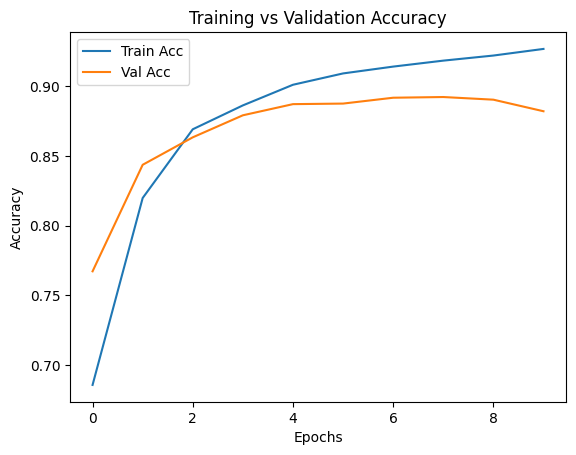

In [50]:
plt.plot(history.history['accuracy'],label='Train Acc')
plt.plot(history.history['val_accuracy'],label='Val Acc')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()